# Exploration of telecom users dataset and prediction


This notebook performs various EDA, summarize information from EDA, Pre-processing of dataset, create pipelines for best model selection and perform the best model for prediction and generates train/test execution details.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format= 'retina'


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-users-dataset/telecom_users.csv


In [2]:
# load data
df = pd.read_csv('../input/telecom-users-dataset/telecom_users.csv')

# EDA

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


As, we can see that there are no null values and the data types in the columns are of int64, float64, object.
The columns 'Unnamed: 0' and 'customerID' doesn't provide any signifiant help in prediction so we can drop those columns

In [5]:
df = df.drop(['Unnamed: 0', 'customerID'], axis = 1)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


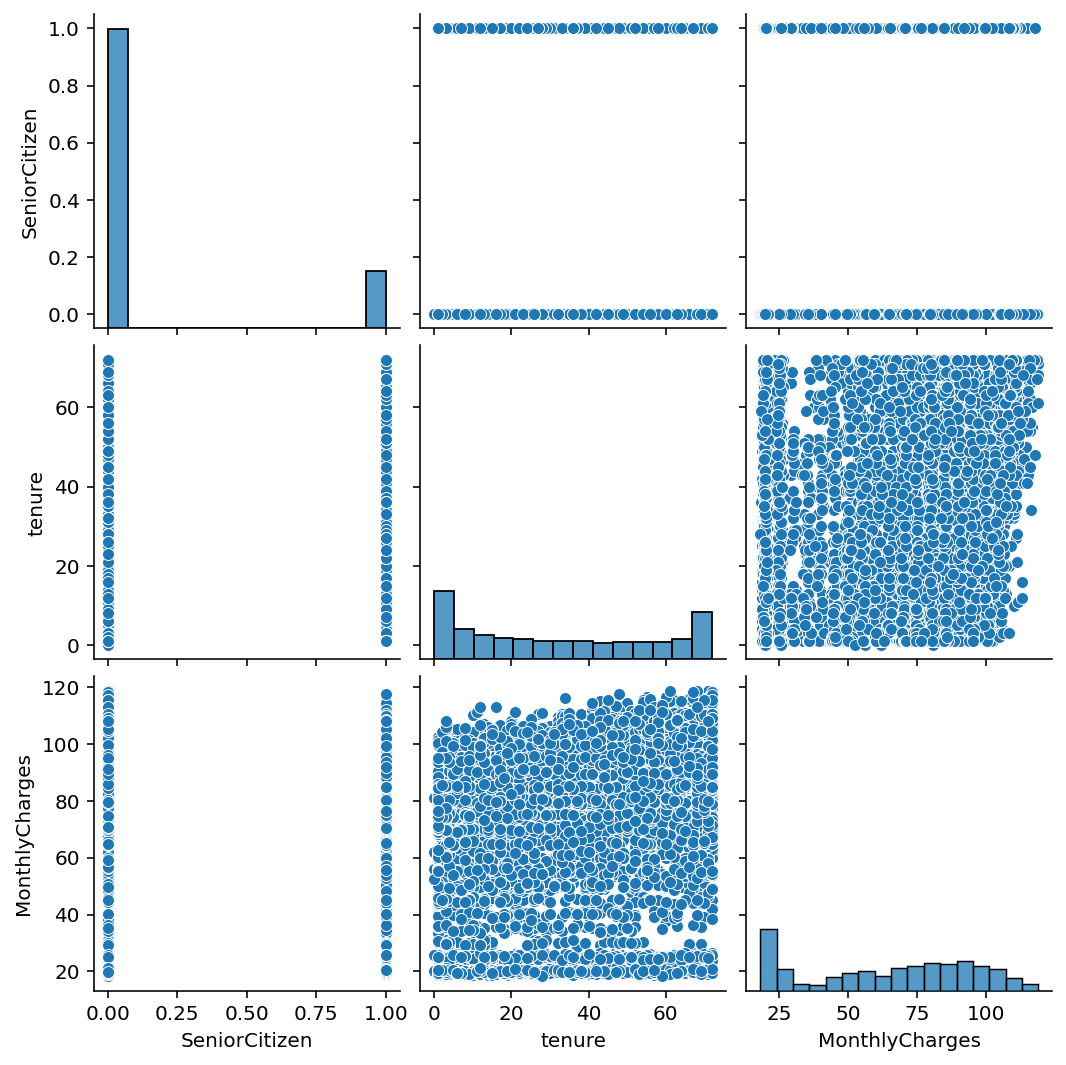

In [8]:
sns.pairplot(df)

The pairplot doesn't provide the patterns for all the dataset columns because all other columns are in categorical data types.

In [9]:
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

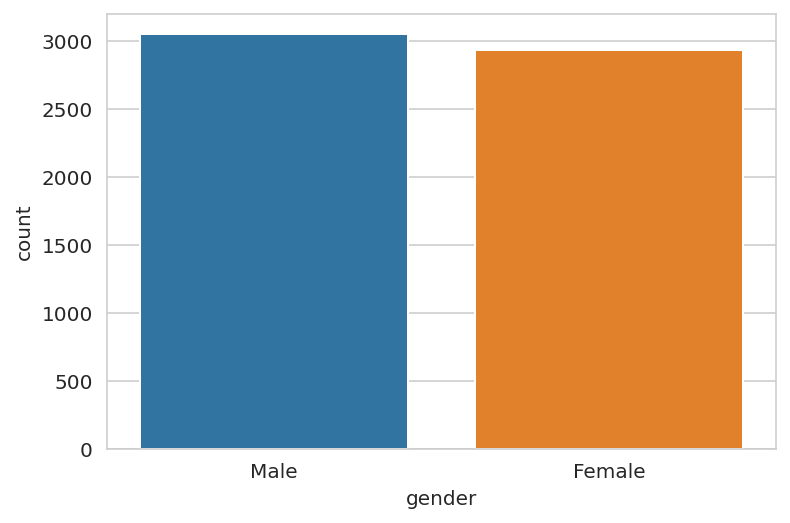

In [10]:
sns.set_style('whitegrid')
sns.countplot(df['gender'])

As we are going to predict the Churn patterns of telecom users, lets explore the relationship between various columns with Churn column

<AxesSubplot:xlabel='Churn', ylabel='count'>

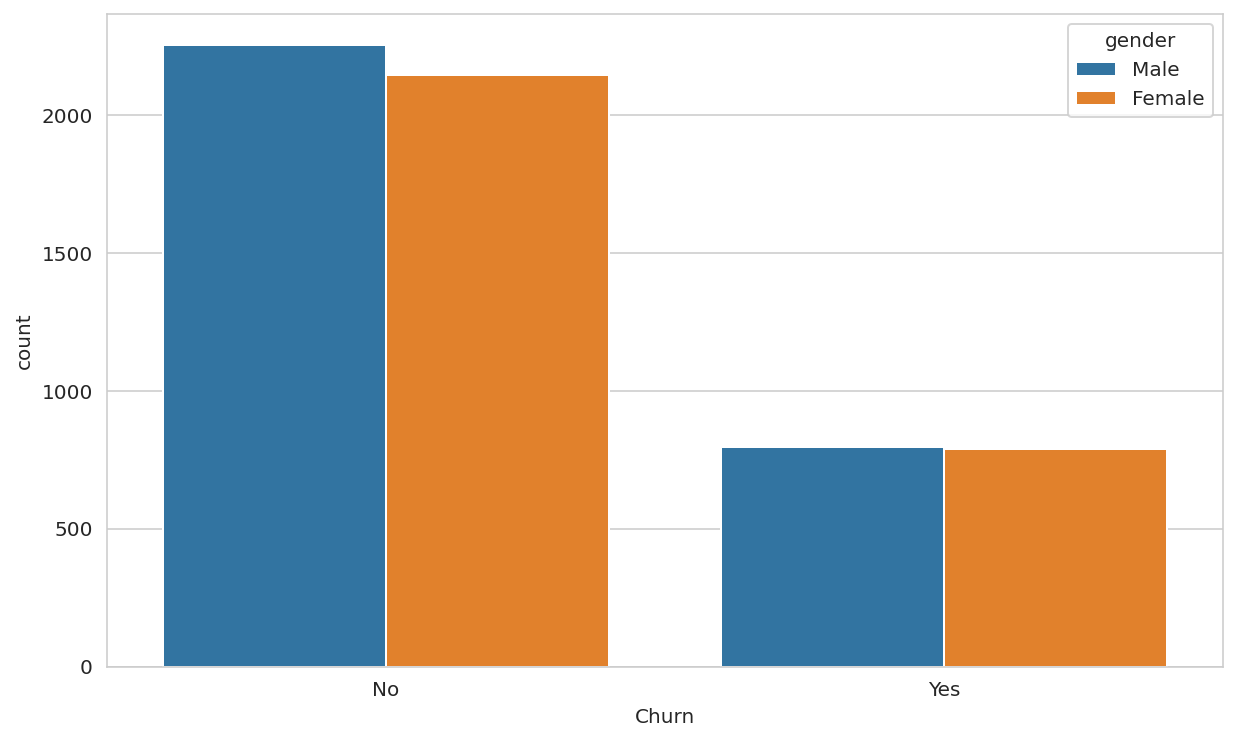

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'gender', data = df)

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

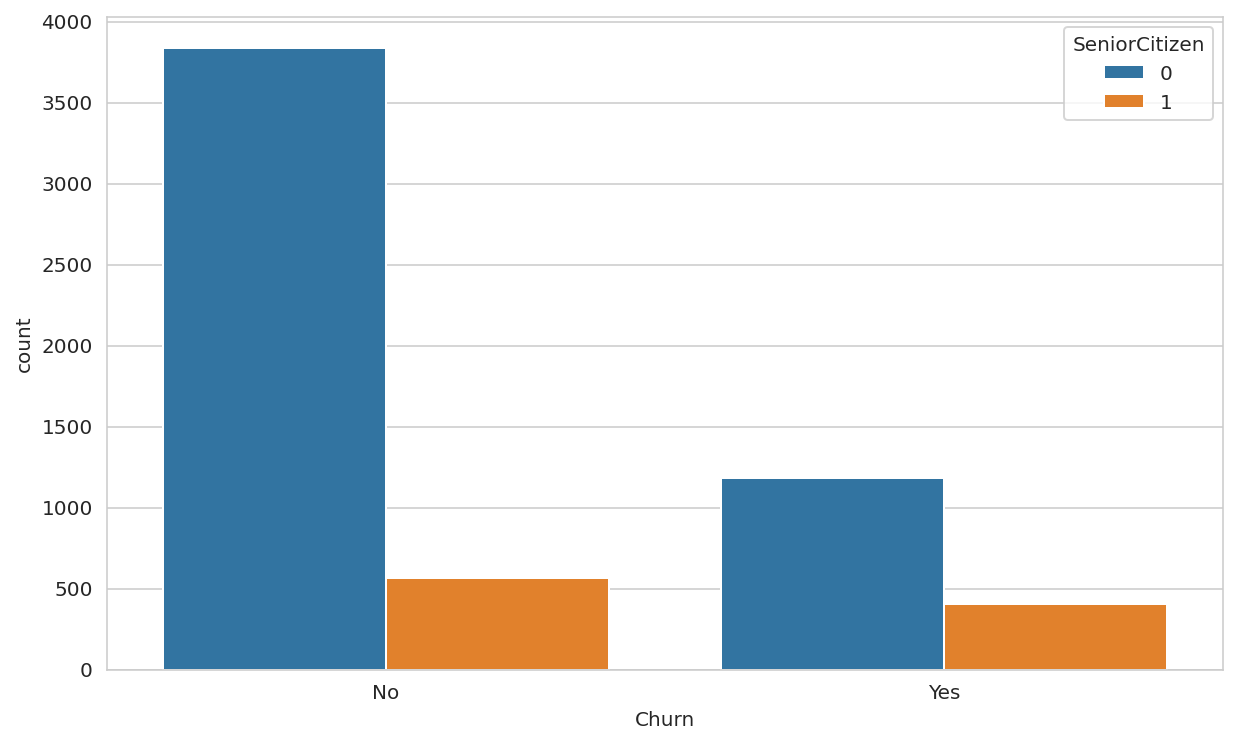

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'SeniorCitizen', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

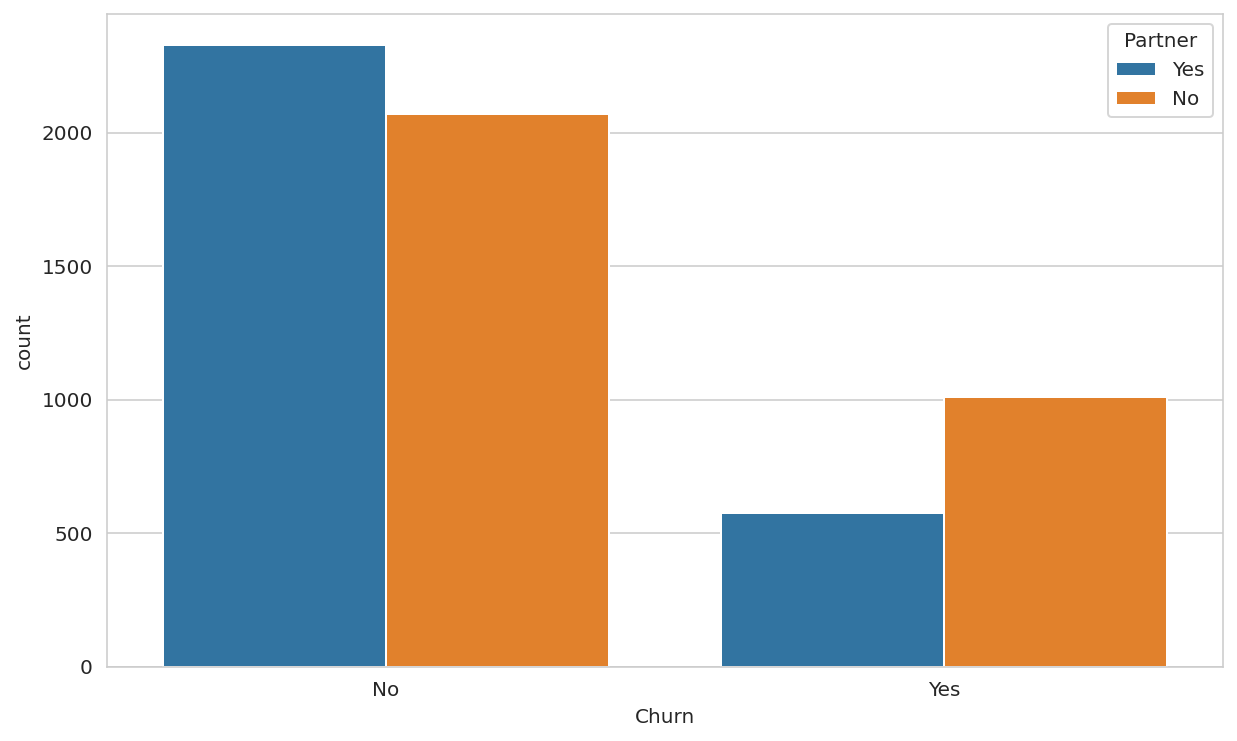

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Partner', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

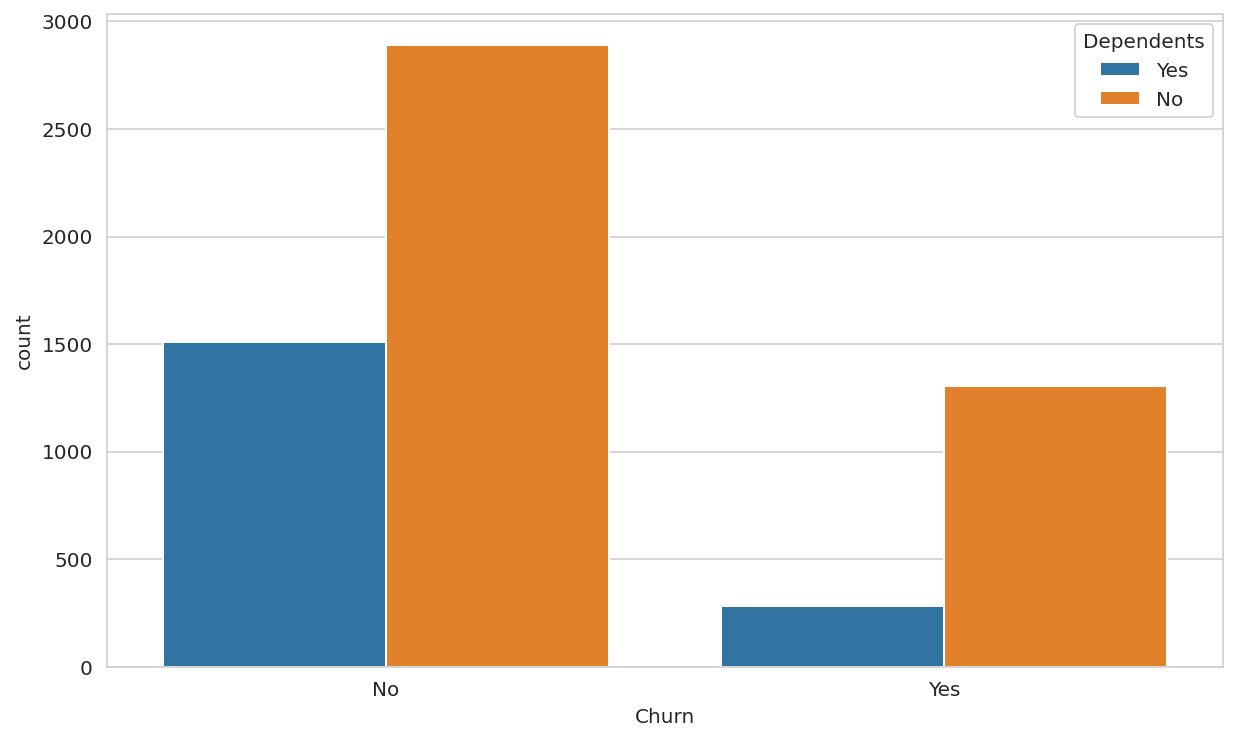

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Dependents', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

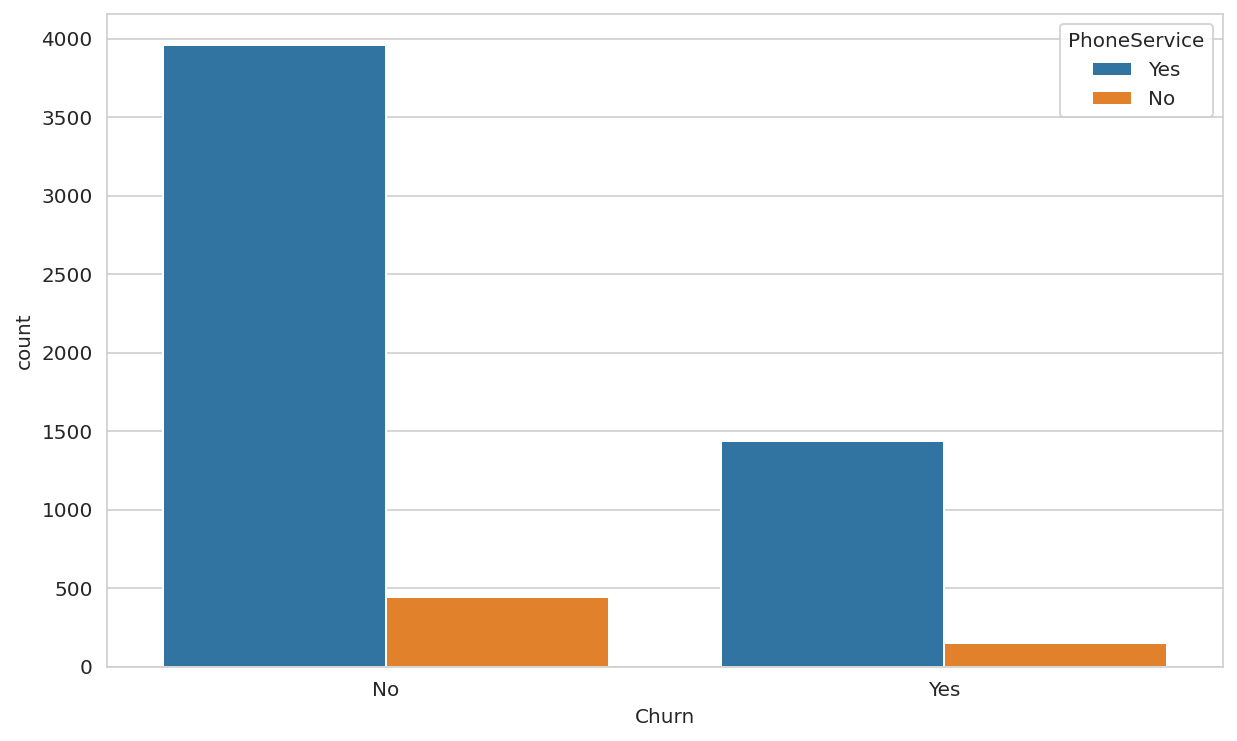

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'PhoneService', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

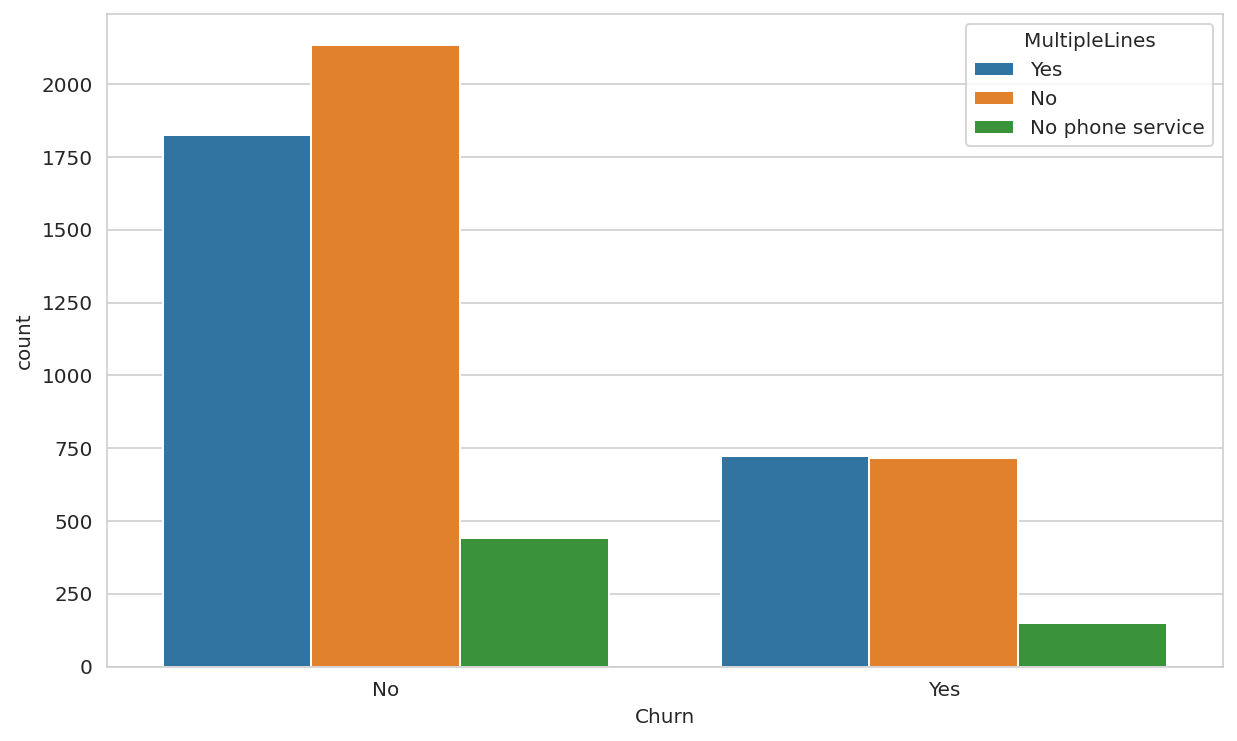

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'MultipleLines', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

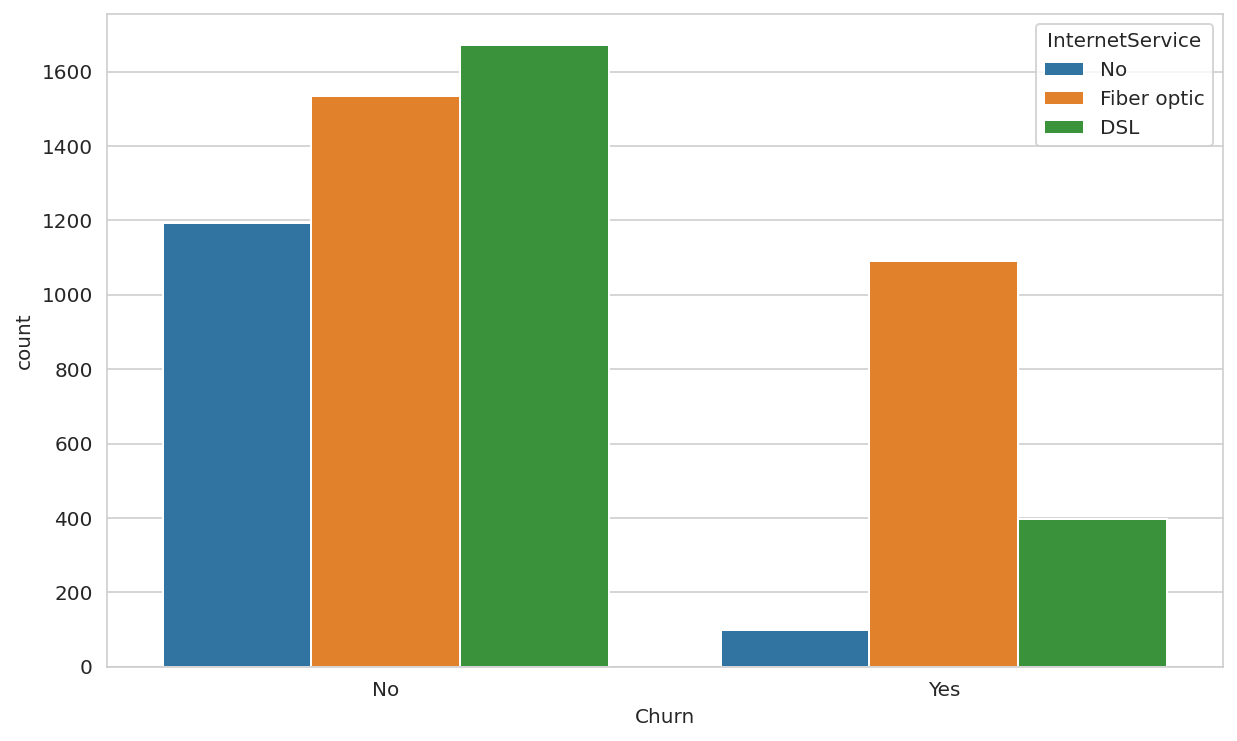

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'InternetService', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

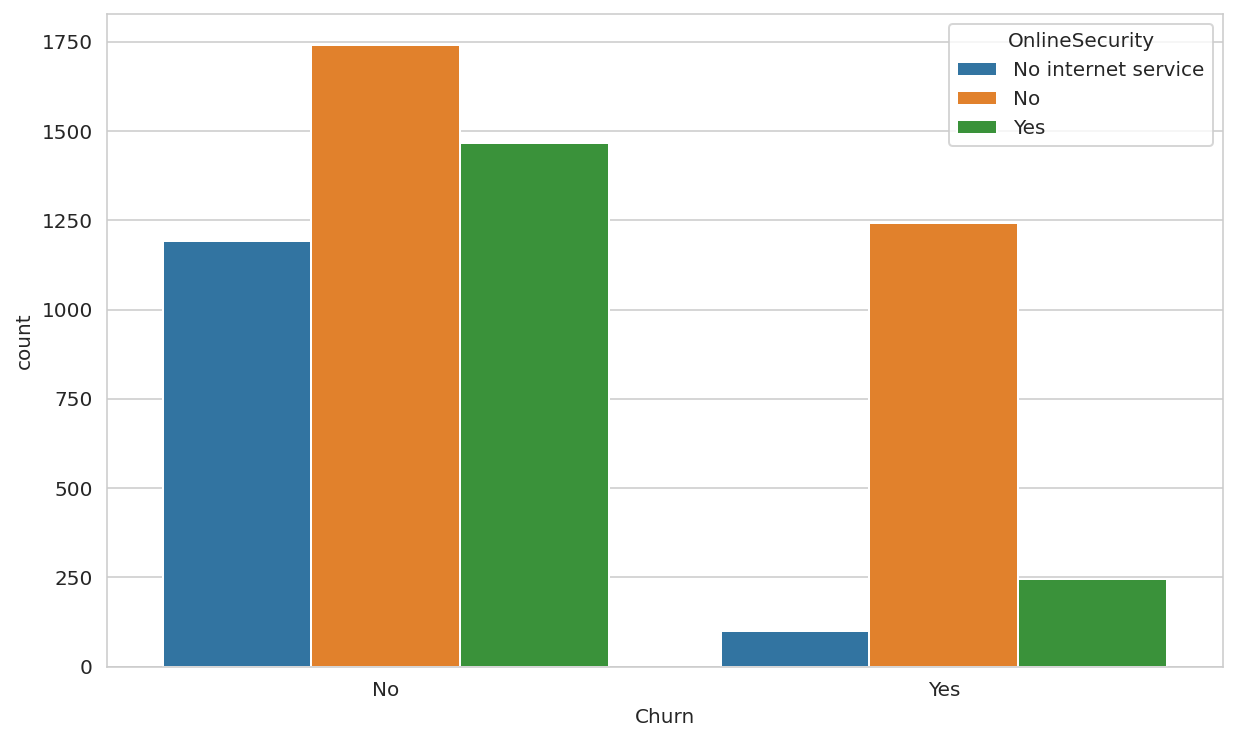

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'OnlineSecurity', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

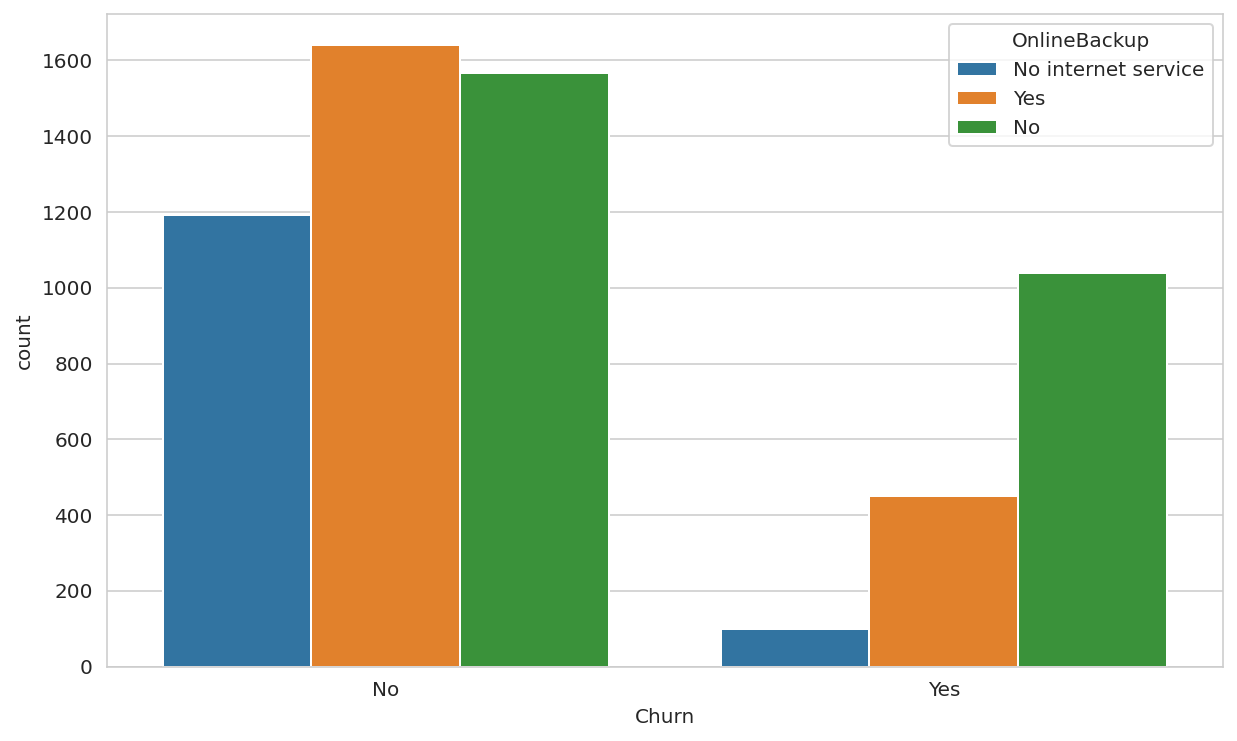

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'OnlineBackup', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

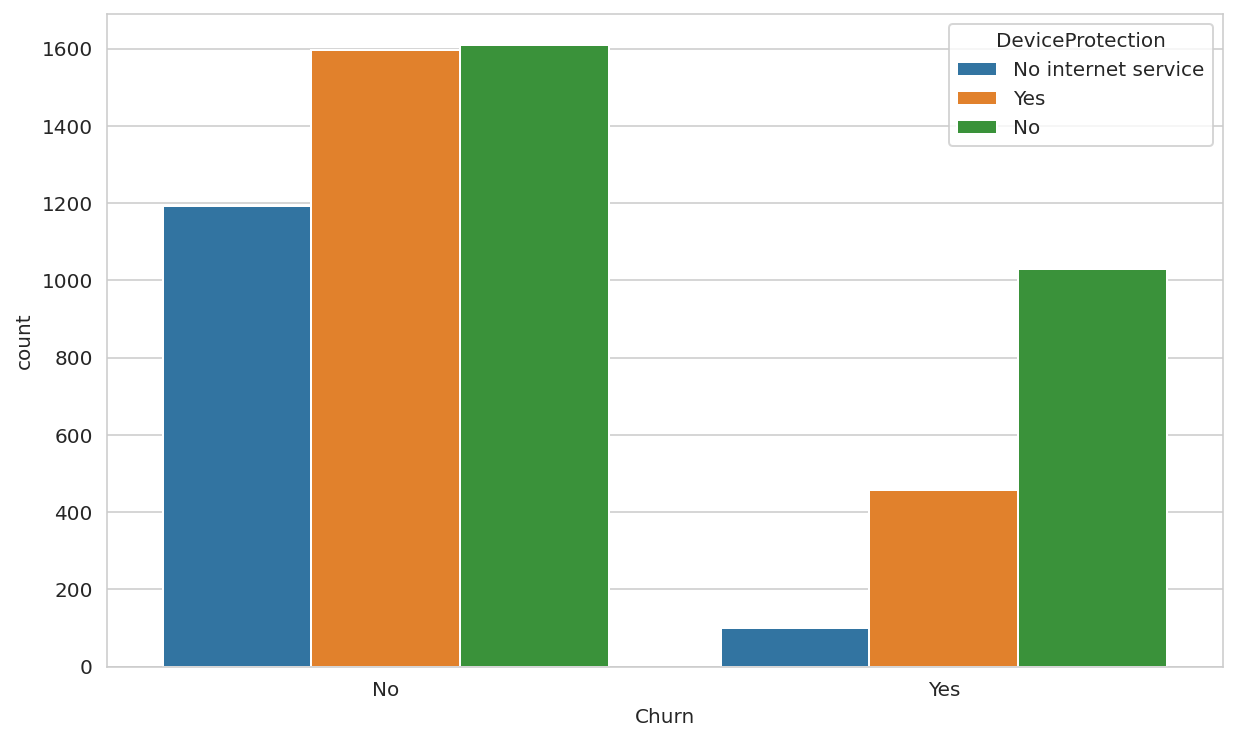

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'DeviceProtection', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

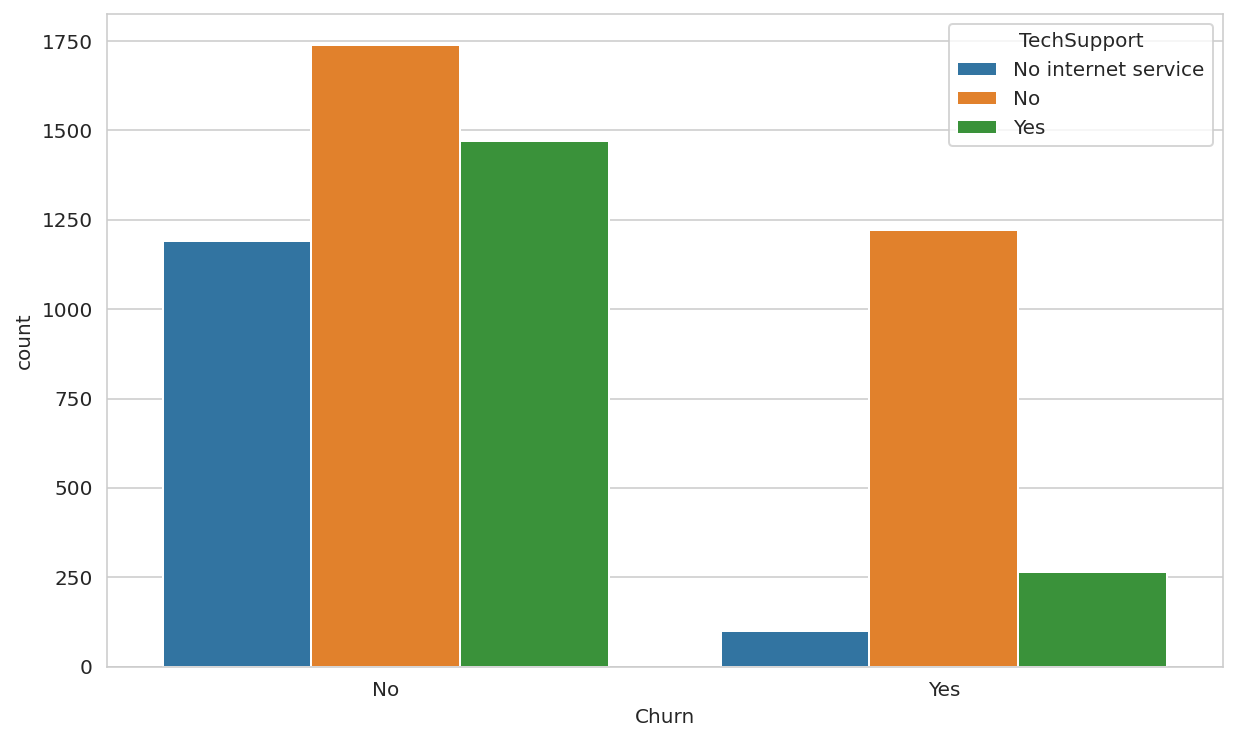

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'TechSupport', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

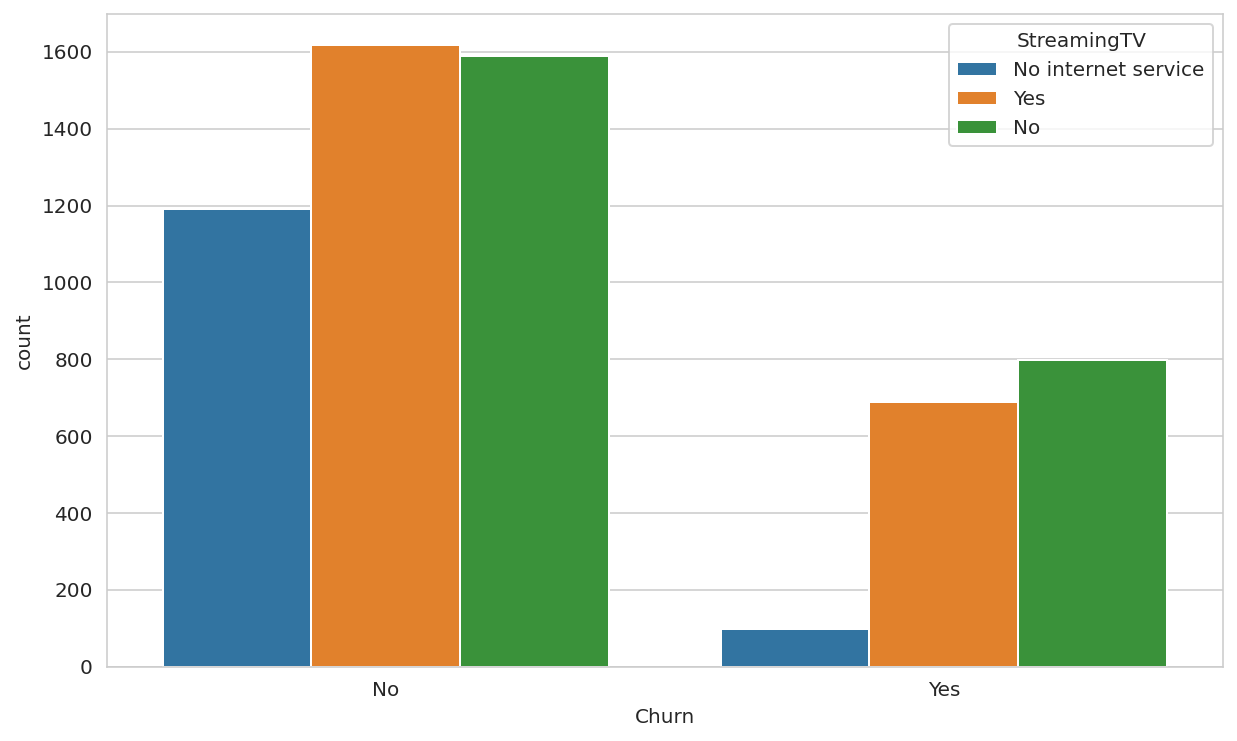

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'StreamingTV', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

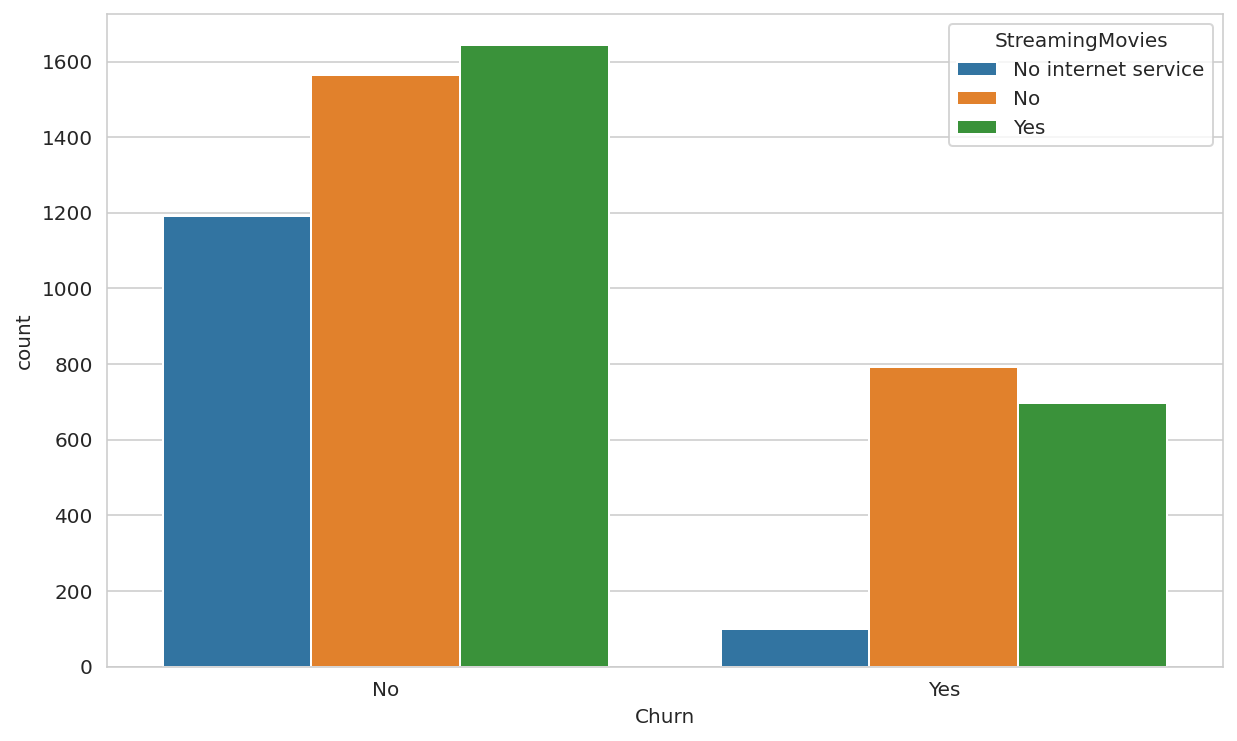

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'StreamingMovies', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

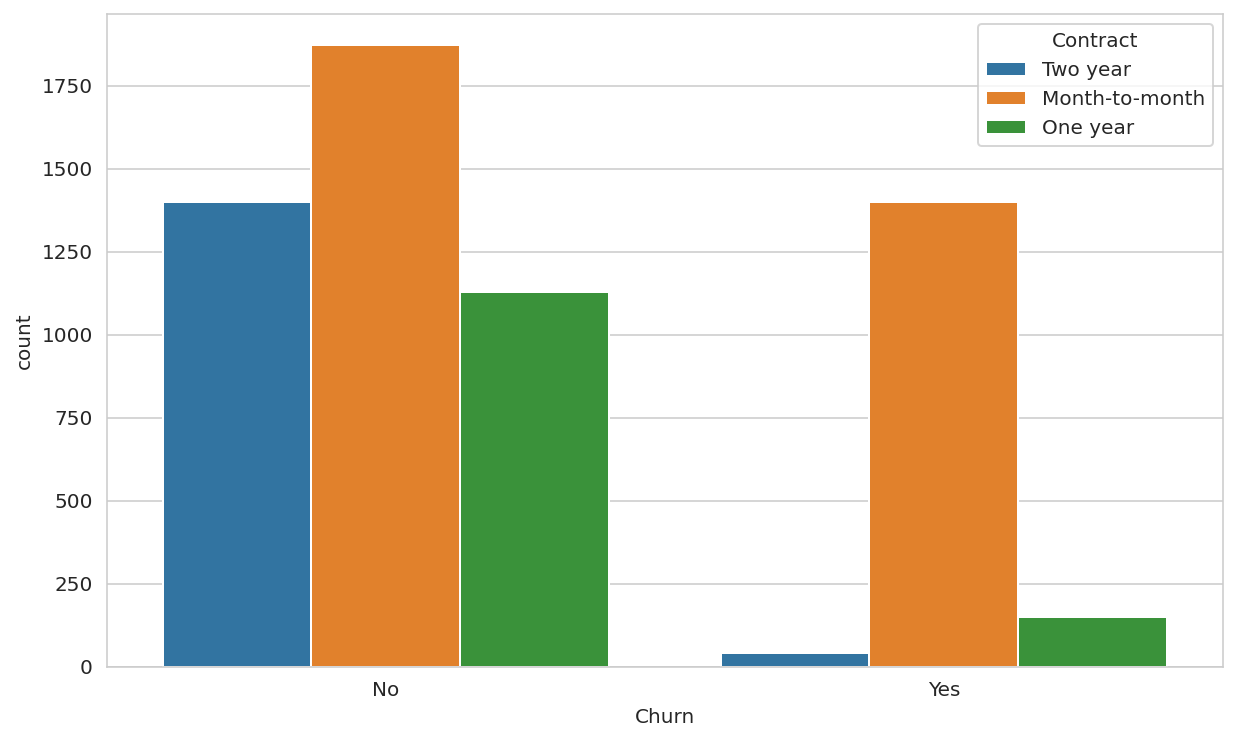

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Contract', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

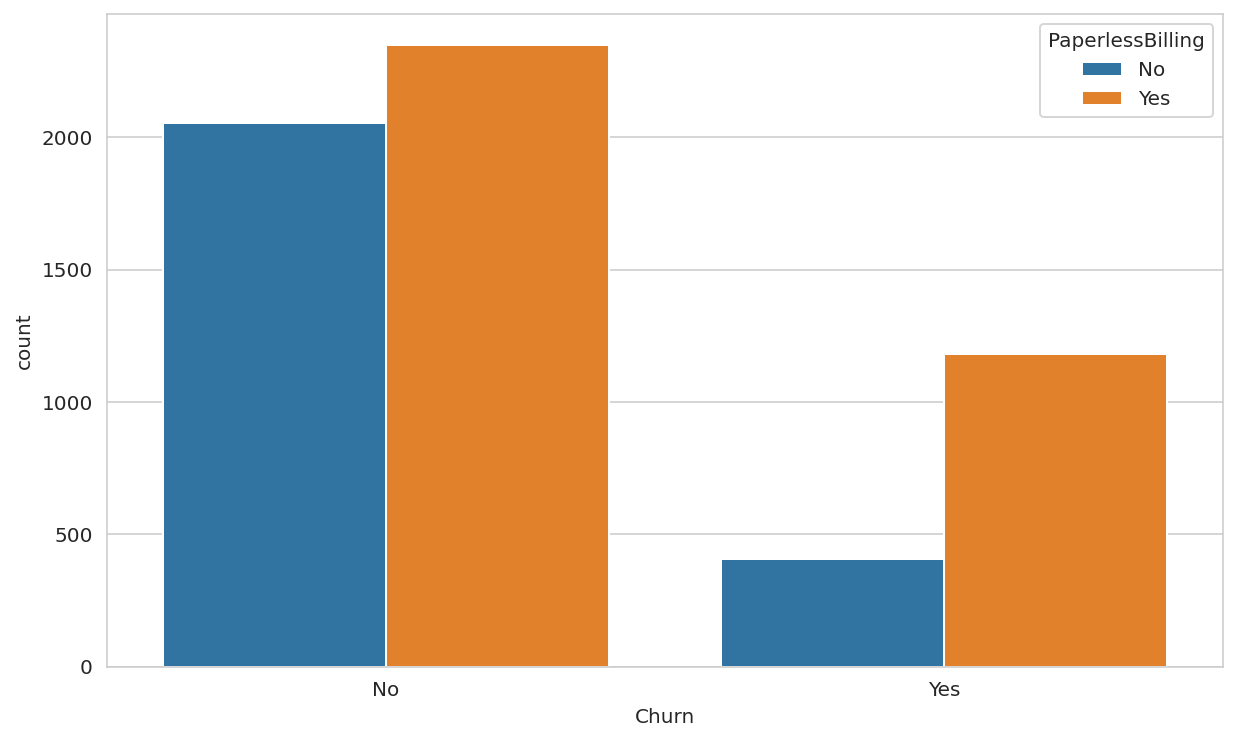

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'PaperlessBilling', data = df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

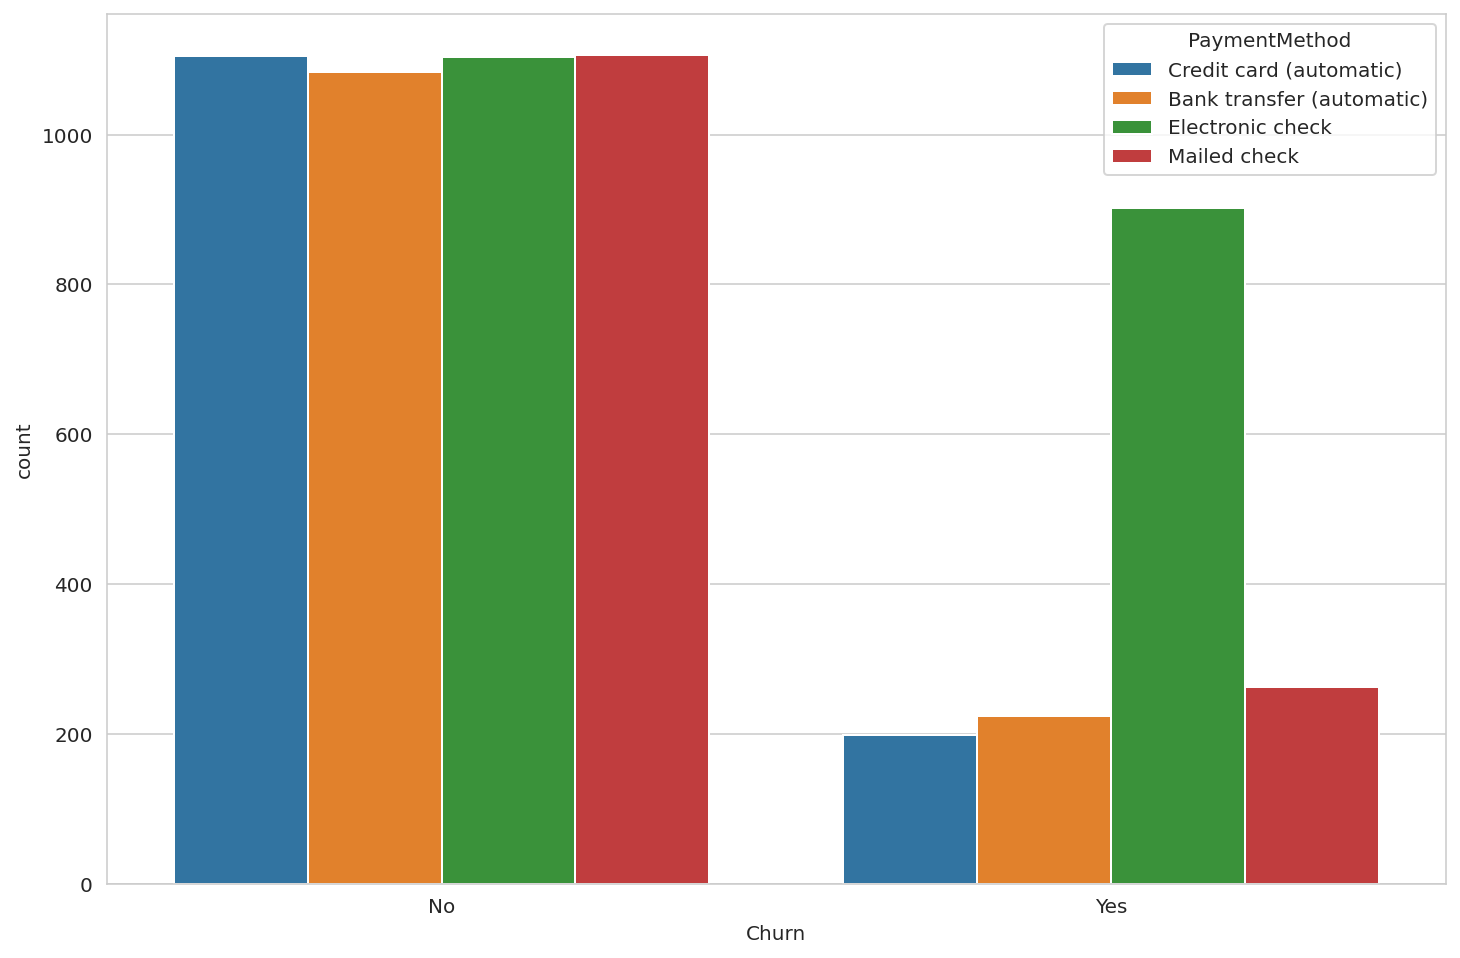

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Churn', hue = 'PaymentMethod', data = df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

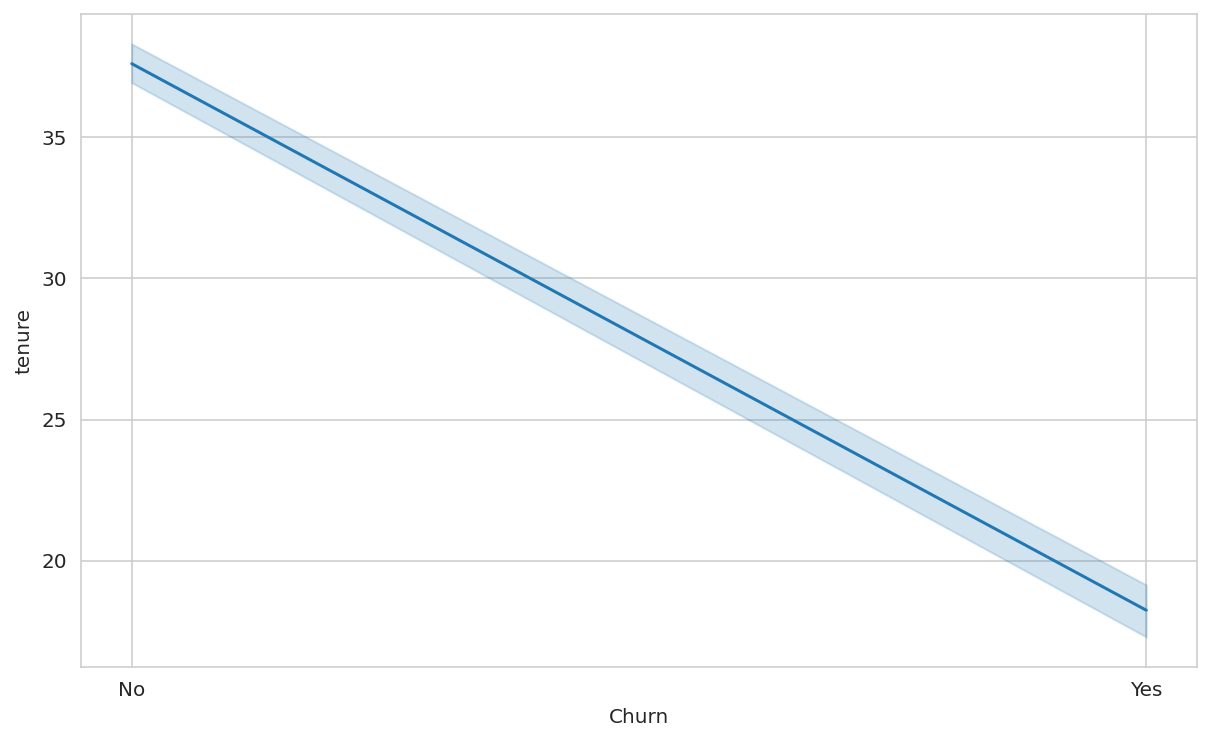

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'tenure', data = df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

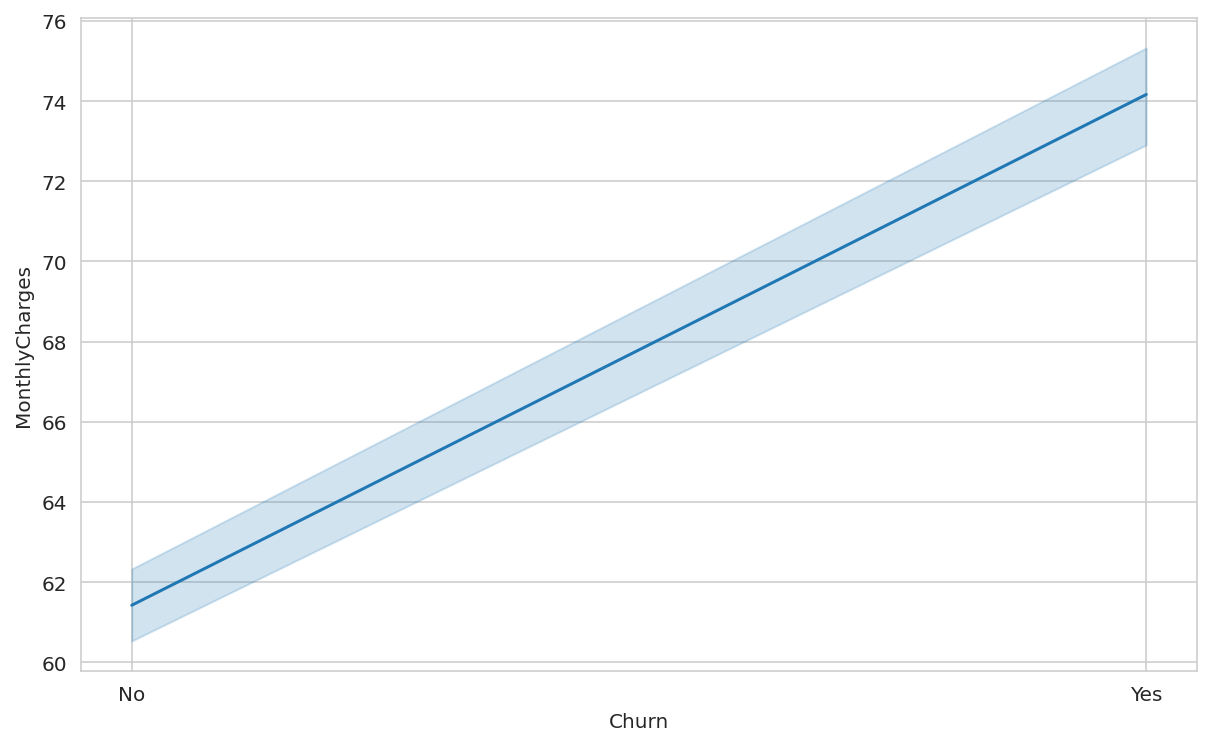

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'MonthlyCharges', data = df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

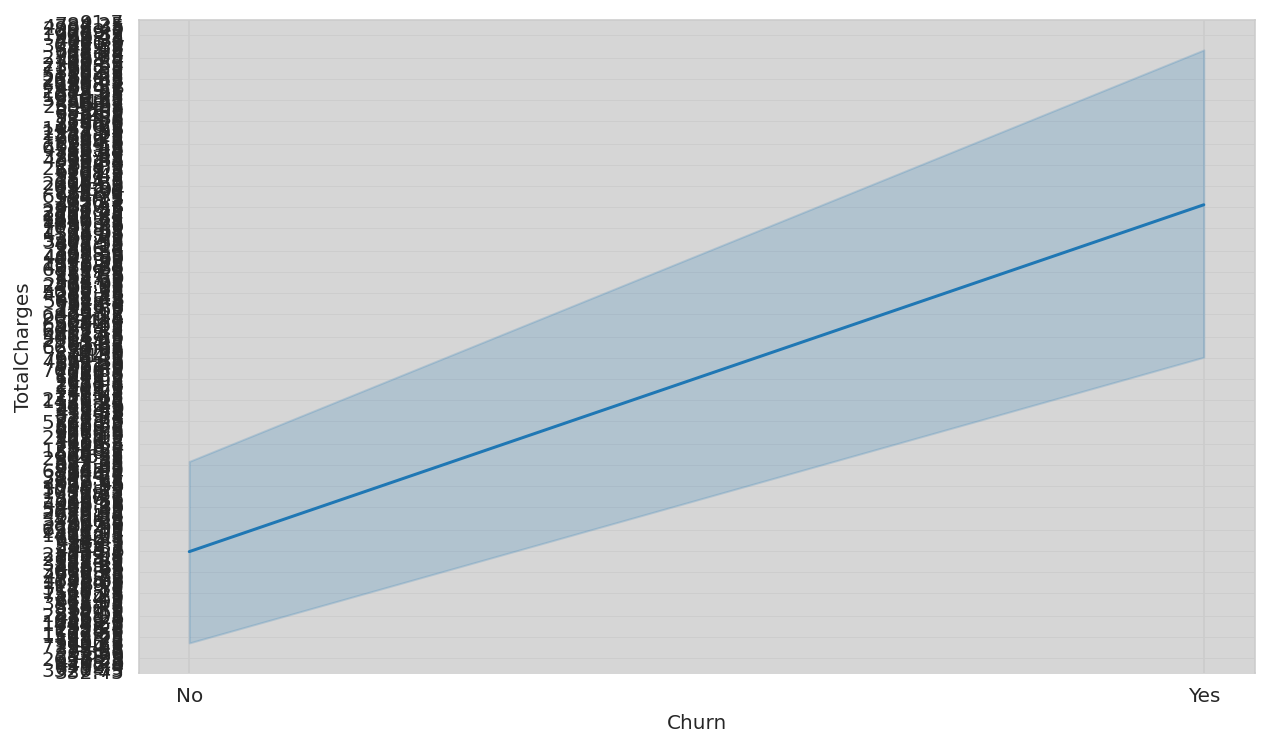

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'TotalCharges', data = df)

# **Information generated from EDA**


**High Churn rate**
1. Telecom users who don't have dependents
2. Telecom users who have fiber-optics internet
3. Telecom users who don't have online security, online backup, device protection, tech support
4. Telecom users who have month-to-month contract
5. Telecom users who have paper billing system
6. Telecom users who have electronic check payment system
7. Telecom users who have low tenure
8. Telecom users who have high monthly charges and high total charges

# Pre-Processing of Data

Now, lets convert the categorical datasets to 0 and 1. Here, pd.factorize() is used to those categorical columns whose values are in two categories. E.g: YES or NO, Male or Female

In [31]:
df['gender'] = pd.factorize(df['gender'])[0]
df['Partner'] = pd.factorize(df['Partner'])[0]
df['Dependents'] = pd.factorize(df['Dependents'])[0]
df['PhoneService'] = pd.factorize(df['PhoneService'])[0]
df['PaperlessBilling'] = pd.factorize(df['PaperlessBilling'])[0]
df['Churn'] = pd.factorize(df['Churn'])[0]

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,1,0,1,1,44,0,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,1,1,0,1,38,0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,0,0,1,1,4,0,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.5,0
4,0,0,1,1,2,0,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.5,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   object 


In [34]:
df.shape

(5986, 20)

Now, lets use the 'one hot encoding' technique for the categorical columns which have more than 2 values.

In [35]:
df = pd.get_dummies(data = df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,72,0,0,24.10,1734.65,0,...,0,1,0,0,0,1,0,1,0,0
1,1,0,1,1,44,0,1,88.15,3973.2,0,...,1,0,0,1,0,0,0,1,0,0
2,1,1,0,1,38,0,1,74.95,2869.85,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0,1,1,4,0,1,55.90,238.5,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,2,0,0,53.45,119.5,0,...,1,0,0,1,0,0,0,0,1,0


In [37]:
df.shape

(5986, 41)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   PaperlessBilling                         5986 non-null   int64  
 7   MonthlyCharges                           5986 non-null   float64
 8   TotalCharges                             5986 non-null   object 
 9   Churn                                    5986 non-null   int64  
 10  MultipleLines_No                         5986 no

In [39]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

# Modeling

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Pipeline Creation**
1. Process data using standard scaler
2. Apply classifier

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [43]:
pipeline_lr = Pipeline([('scaler1', StandardScaler()), 
                       ('lr_classifier', LogisticRegression(random_state = 101))])

In [44]:
pipeline_dt = Pipeline([('scaler2', StandardScaler()), 
                       ('dt_classifier', DecisionTreeClassifier(random_state= 101))])

In [45]:
pipeline_rf = Pipeline([('scaler1', StandardScaler()), 
                       ('rf_classifier', RandomForestClassifier(random_state = 101))])

In [46]:
# list of pipelines
pipelines_list = [pipeline_lr, pipeline_dt, pipeline_rf]

In [47]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ''

In [48]:
# dictionary of pipelines and classifier for further use
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

In [49]:
# fit pipelines
for pipe in pipelines_list:
    pipe.fit(X_train, y_train)

ValueError: could not convert string to float: 

OOPS! We ran into an error. Here, the error is valueError type which says, it couldn't convert string to float.
So, it means the data type of certain column is not numerical. So, lets find out the column name whch is not numerical

# Re-Processing of Data

In [50]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (a

In [51]:
list(set(cols) - set(num_cols))

['TotalCharges']

AHA! The TotalCharge column is not in numerical type. It may consist of string value.

In [52]:
# Changing the totalcharge column into numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # It converts any string value inside the column to NaN

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   PaperlessBilling                         5986 non-null   int64  
 7   MonthlyCharges                           5986 non-null   float64
 8   TotalCharges                             5976 non-null   float64
 9   Churn                                    5986 non-null   int64  
 10  MultipleLines_No                         5986 no

In TotalCharge column, there are 10 null values now as we deleted the NaN values.

In [54]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
356,0,0,1,0,0,0,1,61.90,NaN,0,...,1,0,0,0,0,1,1,0,0,0
634,1,0,0,0,0,1,0,56.05,NaN,0,...,1,0,0,0,0,1,0,1,0,0
2771,0,0,0,0,0,0,0,25.35,NaN,0,...,0,1,0,0,0,1,0,0,0,1
3086,0,0,0,0,0,0,1,19.70,NaN,0,...,0,1,0,0,1,0,0,0,0,1
3255,0,0,0,0,0,0,0,19.85,NaN,0,...,0,1,0,0,0,1,0,0,0,1
4326,1,0,0,0,0,0,0,80.85,NaN,0,...,0,0,1,0,0,1,0,0,0,1
5375,0,0,1,0,0,0,0,20.25,NaN,0,...,0,1,0,0,0,1,0,0,0,1
5382,1,0,0,0,0,0,0,20.00,NaN,0,...,0,1,0,0,0,1,0,0,0,1
5695,1,0,0,0,0,1,1,52.55,NaN,0,...,1,0,0,0,0,1,1,0,0,0
5951,0,0,0,0,0,0,0,25.75,NaN,0,...,0,1,0,0,0,1,0,0,0,1


It seems that the null values in totalcharges synchronizes with the values of tenure as 0. So, lets initialize the value of these null values to 0

In [55]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   PaperlessBilling                         5986 non-null   int64  
 7   MonthlyCharges                           5986 non-null   float64
 8   TotalCharges                             5986 non-null   float64
 9   Churn                                    5986 non-null   int64  
 10  MultipleLines_No                         5986 no

In [57]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


So, no more null values. As, we have cleaned data so lets initialize the X and y variable and split the train and test dataset again and fit into pipelines again.

In [58]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
# fit pipelines
for pipe in pipelines_list:
    pipe.fit(X_train, y_train)

In [61]:
for i, model in enumerate(pipelines_list):
    print('{} test accuracy: {}'.format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression test accuracy: 0.8023385300668151
Decision Tree test accuracy: 0.7232739420935412
Random Forest test accuracy: 0.782293986636971


# Selection of ML Model

It was found that the Logistic Regression performs with better accuracy. Therefore, lets use the Logistic Regression.

In [62]:
# Using StandardScaler on data
stand_scale = StandardScaler()
X_train = stand_scale.fit_transform(X_train)
X_test = stand_scale.fit_transform(X_test)

In [63]:
# Performing Logistic Regression
log_r = LogisticRegression(random_state= 101)
log_train = log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train/Test Execution Information

In [65]:
# Cross validation score
cross_val = cross_val_score(estimator= log_r, X = X_train,  y= y_train, cv = 10)
print('cv:', cross_val.mean())

y_train_pred = log_r.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print('Training set accuracy: ', accuracy_train)


accuracy_test = accuracy_score(y_test, y_pred)
print('Test set accuracy: ', accuracy_test)


cv: 0.7978520286396182
Training set accuracy:  0.8009546539379475
Test set accuracy:  0.799554565701559


In [66]:
print(confusion_matrix(y_test, y_pred))

[[1171  133]
 [ 227  265]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1304
           1       0.67      0.54      0.60       492

    accuracy                           0.80      1796
   macro avg       0.75      0.72      0.73      1796
weighted avg       0.79      0.80      0.79      1796

